#**Problem Statement**

###**Business Context**

The advent of e-news, or electronic news, portals have offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

###**Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing
landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?

###**Data Dictionary**

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page

## **Import the necessary Libraries**

In [ ]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

#%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

## **Loading the dataset**

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/My Drive/python intro/E-newsExpress-project/abtest.csv")
df=data.copy() #createing a copy of the original DataFrame data  without affecting the original dataset.

Mounted at /content/drive


## **Understanding the structure of the data**

**Displaying few rows of the dataset**

In [ ]:
df.head() # Loading first 5 rows of the data

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.tail() # Loading last 5 rows of the data

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


**Observations:**
* The DataFrame comprises 6 columns, as detailed in the Data Dictionary, and each row represents a user's interaction with a specific version of the landing page.

**Inspecting the Dataset Dimensions**

In [ ]:
df.shape

(100, 6)

**Observations:**
* The dataframe contains 100 rows and 6 columns

**Examining Data Types of Columns in the Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observations:**
* All columns have 100 non-null entries, meaning there are no missing values in the dataset.
* The columns include both categorical (e.g., group, landing_page, converted, language_preferred) and numerical (e.g., time_spent_on_the_page, user_id) data types.



**Statistical Summary of the Dataset**

In [ ]:
#Statistical summary of numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


**Observations:**
* The user_id column represent unique Id of the user visiting.
* The "time_spent_on_the_page" column has a mean of 5.38 minutes and a standard deviation of 2.38 minutes, with the minimum time spent being 0.19 minutes and the maximum being 10.71 minutes.
* The 25th percentile of time spent is 3.88 minutes, while the 75th percentile is 7.02 minutes.
* The median (50th percentile) time spent on the page is 5.42 minutes.

In [ ]:
#Statistical summary of categorical variables
df.describe(include = ['object']).T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


**Observations:**
* The variables "group," "landing_page," and "converted" each have only two categories.
* The distribution of users in the "group" and "landing_page" columns is equal, with 50 users in each category.
* More than 50% of the users have been converted, as the "converted" variable has "yes" as the most frequent category.
* The "language_preferred" column contains three categories, with "Spanish" being the most preferred language by the users.

**Checking for missing values**

In [ ]:
df.isna().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


**Observations:**
* There are no missing values in any of the columns

## **Exploratory Data Analysis**




## Univariate Data Analysis


Exploring numeriacal variables

**Observations on user_id**

In [ ]:
df['user_id'].nunique()

100

* There are 100 unique users in the dataframe

**Observations on time_spent_on_the_page**

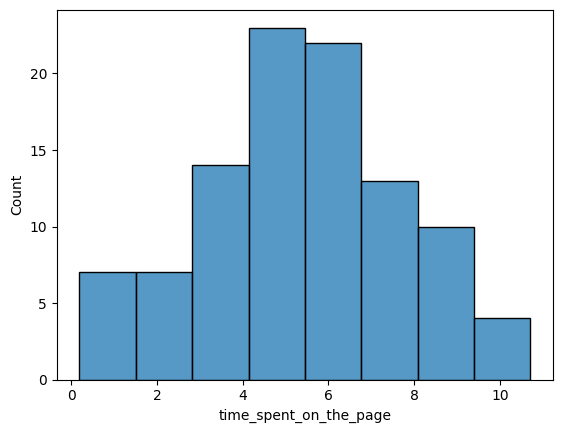

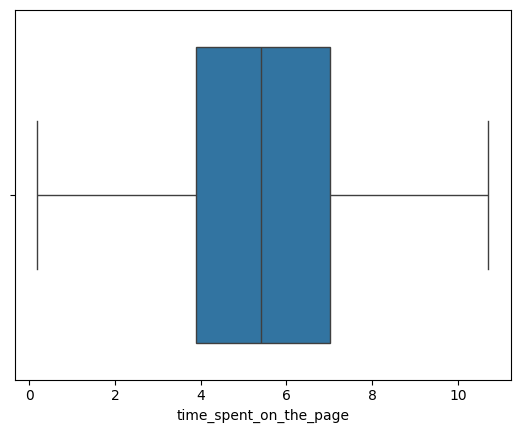

In [ ]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

* The distribution of time spent on the page appears to be approximately normal.
* No significant outliers are observed in the time spent on the page.

Exploring categorical variables


**Observations on 'group'**

In [ ]:
df['group'].value_counts()

,count
group,
control,50
treatment,50


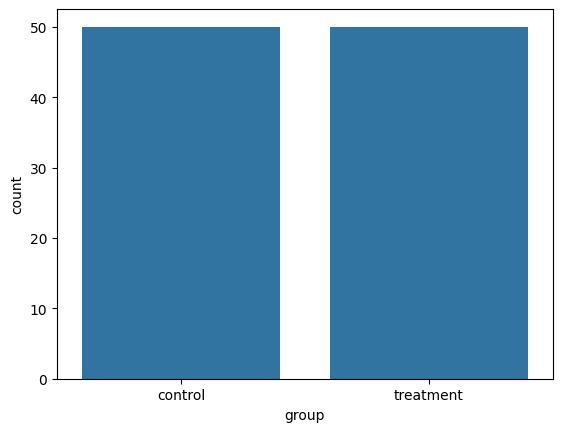

In [ ]:
sns.countplot(data=df,x='group')
plt.show()

* The number of users is evenly distributed between the two groups.

**Observations on landing_page**

In [ ]:
df['landing_page'].value_counts()

,count
landing_page,
old,50
new,50


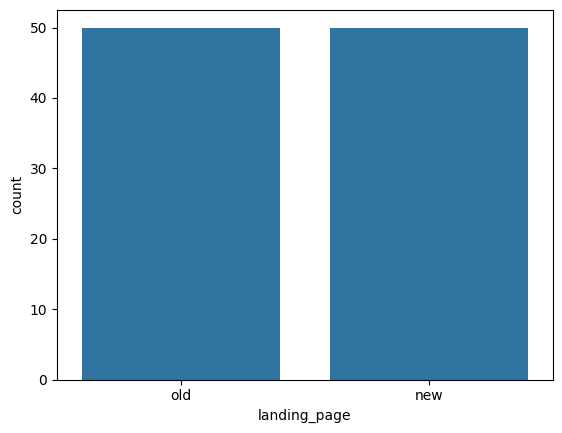

In [ ]:
sns.countplot(data=df,x='landing_page')
plt.show()

* The distribution of the number of users across the two landing pages are the same.

**Observations on converted**

In [ ]:
df['converted'].value_counts()

,count
converted,
yes,54
no,46


<ipython-input-15-2422238d3741>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='converted',palette='pastel')


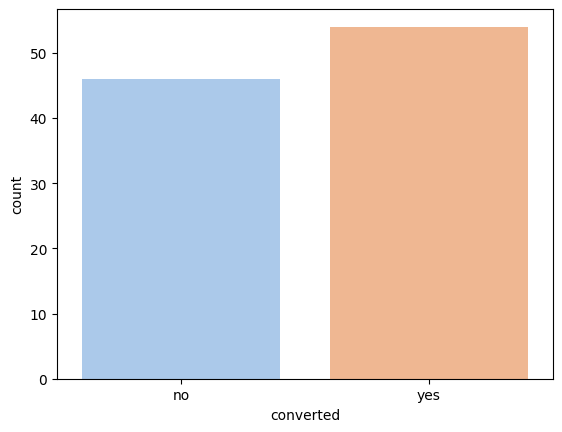

In [ ]:
sns.countplot(data=df,x='converted',palette='pastel')
plt.show()

* A total of 54 users converted, while 46 did not, after visiting the landing page.

**Observations on language_preferred**

In [ ]:
df['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


<ipython-input-14-5d55c0b1b20e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='language_preferred',palette='pastel')


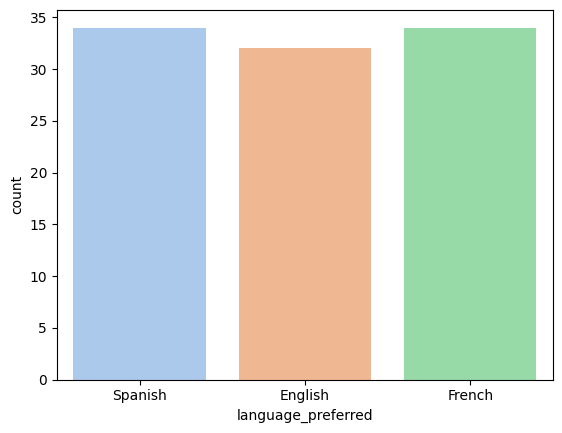

In [ ]:
sns.countplot(data=df,x='language_preferred',palette='pastel')
plt.show()

* The distribution of users across preferred languages is relatively balanced.

* There are three unique preferred languages: English, French, and Spanish, with Spanish and French being equally and most preferred by users.

## Bivariate Data Analysis

**Landing page vs Time spent on the page**

<ipython-input-22-cd458a82f862>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page',palette='pastel')


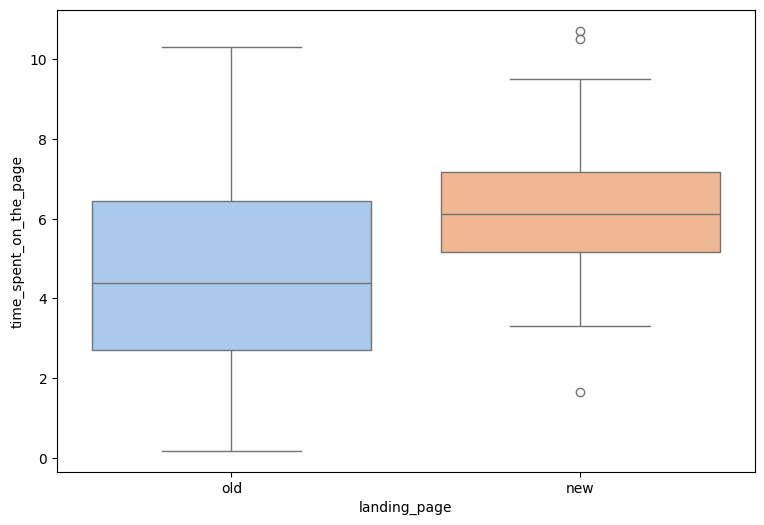

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page',palette='pastel')
plt.show()

*
The time spent on the new landing page appears to be higher compared to the time spent on the old landing page.

**Group vs Time spent on the page**

<ipython-input-28-8354c4b12f5e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='time_spent_on_the_page', data=df, palette='Set2')


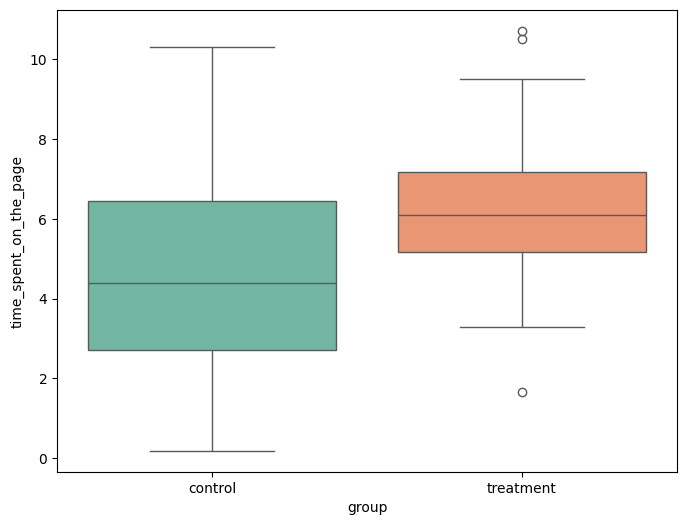

In [ ]:
plt.figure(figsize=(8, 6))

# Create the boxplot to show distribution of 'time_spent_on_the_page' by 'group'
sns.boxplot(x='group', y='time_spent_on_the_page', data=df, palette='Set2')

# Show plot
plt.show()

 * The treatment group spends more time on the page, with the potential for more variation, while the control group has a more consistent but slightly shorter time spent.

**Conversion status vs Time spent on the page**

<ipython-input-30-0ee1a0493c68>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='converted',y='time_spent_on_the_page',palette='pastel')


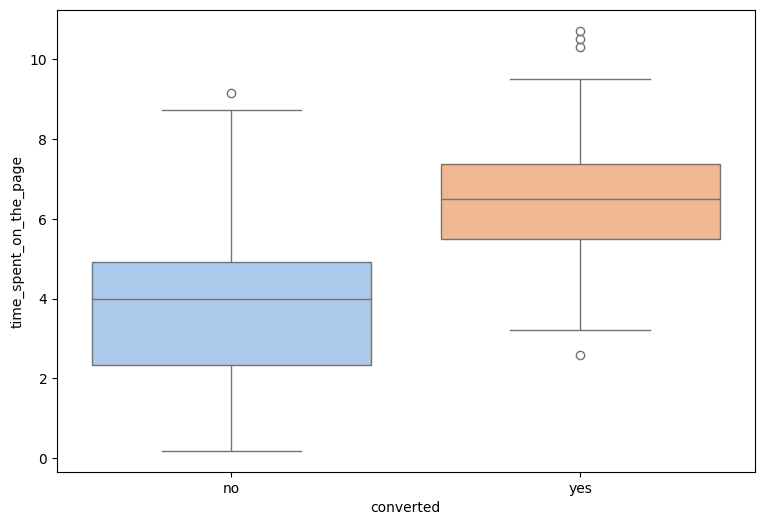

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page',palette='pastel')
plt.show()

* Users who get converted generally appear to spend more time on the landing page compared to those who do not.








**Preferred language vs Time spent on the page**

<ipython-input-26-396237510a04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', data = df,palette='pastel')


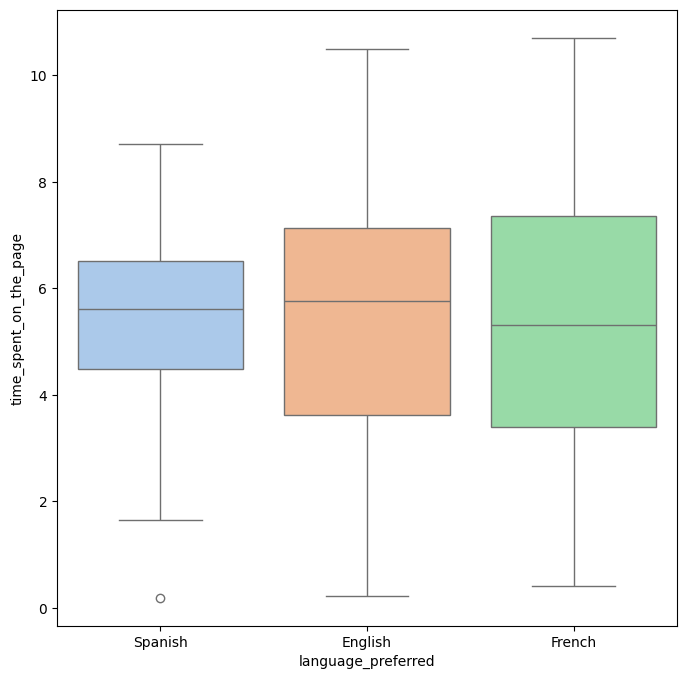

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', data = df,palette='pastel')
plt.show()

* The median time spent by users of different preferred languages appears to be roughly the same.

## **Key Insights from Exploratory Data Analysis (EDA)**
**Individual Variable Insights:**

* Time Spent on the Page:
The distribution of time spent on the page is relatively normal, with no significant outliers.
The median time spent on the page is approximately 5.4 minutes.
* Conversion:
Approximately 54% of users converted to subscribers.

* Preferred Language:
The distribution of preferred languages is fairly uniform, with English, French, and Spanish being the most common choices.

**Relationship Between Variables:**

* Landing Page vs. Time Spent:
Users tend to spend more time on the new landing page compared to the old one.
* Conversion vs. Time Spent:
Users who convert to subscribers generally spend more time on the landing page, suggesting a positive correlation between time spent and conversion.
* Preferred Language vs. Time Spent:
There is no significant difference in the time spent on the new landing page across different language preferences.

**Conclusion:** Overall, the EDA suggests that the new landing page is more effective than the old one in terms of user engagement and conversion rates. The data indicates that users spend more time on the new page and are more likely to convert to subscribers.










## **1. Do the users spend more time on the new landing page than the old landing page?**

**Visual Analysis**

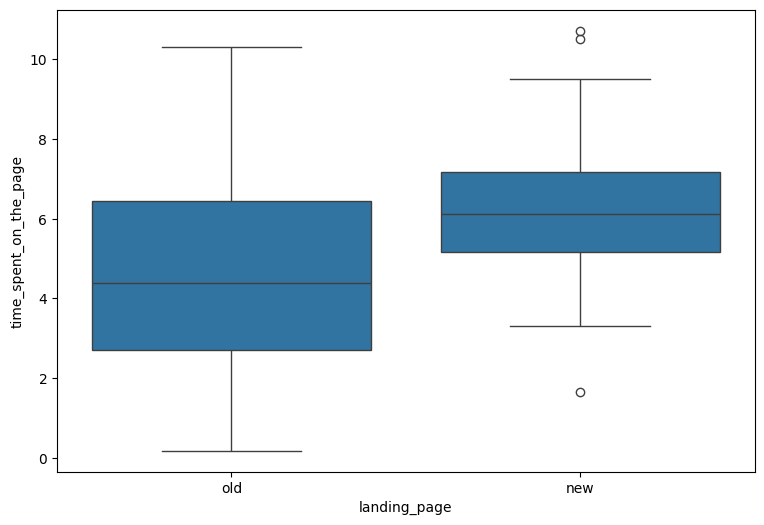

In [ ]:
# visual analysis of the time spent by users on the new and old landing pages
plt.figure(figsize=(9,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

*
People tend to spend more time on the new landing page compared to the old one, indicating better engagement with the updated design.








### Step 1: Let's write the null and alternative hypothesis

The null hypothesis ($H_0$) is:

> $H_0$: The mean time spent by the users on the new page is equal to the mean time spent by the users on the old page.

The alternative hypothesis ($H_a$):

> $H_a$: The mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.


Let $\mu_1, \mu_2$ be the mean time spent by the users on the new and old page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$


### Step 2:  Select the appropriate test
* Since the comparison involves the means of two independent groups (new vs. old), the appropriate test is the two-sample independent t-test.
* This test is used to determine if there is a statistically significant difference in the means between the two groups.

### Step 3:Decide on the Significance Level (𝛼)

* Choose a significance level, typically
𝛼=0.05 (5%).

### Step 4: Preview and Prepare Data

In [ ]:
time_spent_Newpage=df[df['landing_page']=='new']['time_spent_on_the_page']
time_spent_Oldpage=df[df['landing_page']=='old']['time_spent_on_the_page']

In [ ]:
print('The standard deviation of the time spent on new page:',round(time_spent_Newpage.std(),2) )
print('The standard deviation of the time spent on old page:',round(time_spent_Oldpage.std(),2) )

The standard deviation of the time spent on new page: 1.82
The standard deviation of the time spent on old page: 2.58


Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.

### Step 5: Calculate the p-value

The ttest_ind() function of Scipy will be used to compute the test statistic and p-value.

In [ ]:
#import required functions
from scipy.stats import ttest_ind

#finrd p-value
test_stat,p_value=ttest_ind(time_spent_Newpage,time_spent_Oldpage,equal_var=False,alternative='greater')
print('The p-value is', p_value)


The p-value is 0.0001392381225166549


###Step 6: Compare the p-value with  α


In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7: Draw inference

As the p-value is less than the significance level(α), so we reject the null hypothesis.

**Conclusion:** There is significant evidence that the mean time spent on the new page is greater than on the old page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

**Visual analysis:**

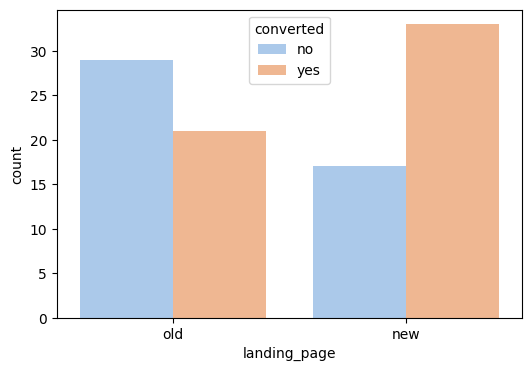

In [ ]:
# visual analysis of the conversion rate for the new page and the conversion rate for the old page
plt.figure(figsize=(6, 4))
sns.countplot(x='landing_page', hue='converted', data=df, palette='pastel')
plt.show()

By examining the plot above, it appears that a greater number of users get converted on the new landing page compared to the old page. To determine if there is sufficient statistical evidence to support this observation, we will conduct a hypothesis test to assess whether the conversion rate for the new page is indeed greater than that of the old page.

### Step 1: Let's write the null and alternative hypothesis

The null hypothesis ($H_0$) is:

> $H_0$: The conversion rate for the new page is equal to the conversion rate for the old page.

The alternative hypothesis ($H_a$):

> $H_a$: The conversion rate for the new page is greater than the conversion rate for the old page.

Let $p_1,p_2$ be the proportion of users who visit the landing page and get converted from new and old respectively.

The manufacturer will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 >\ p_2$

### Step 2: Select the Appropriate Test

To determine if the conversion rate for the new page is higher than that for the old page, we need to compare the proportions of users who were converted on each page. This involves a hypothesis test for comparing two independent proportions.

Test to Use:

**Z-test for two proportions**

Reasoning:

* The two groups (users on the new page and users on the old page) are independent, as we are comparing the conversion rates between these two distinct groups.
* The focus is on comparing proportions: the goal is to assess the difference in conversion rates (the proportion of users converted) between the two pages.
* The alternative hypothesis is one-tailed: We are interested in testing if the conversion rate for the new page is greater than that for the old page, which means the test is one-tailed.







### Step 3:Decide on the Significance Level (𝛼)

* Choose a significance level, typically
𝛼=0.05 (5%).

### Step 4: Collect and prepare data

In [ ]:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
print('The numbers of converted users for the new and old pages are {0} and {1} respectively'.format(new_converted, old_converted))
n_control = df.group.value_counts()['control'] # number of users in the control group
n_treatment = df.group.value_counts()['treatment'] #number of users in the treatment group
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of converted users for the new and old pages are 33 and 21 respectively
The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

 The test statistic is calculated using the proportions_ztest() function.

In [ ]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative = 'larger')
print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with  α



In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7: Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis.

**Conclusion:** There is sufficient statistical evidence to suggest that the conversion rate for the new page is higher than that for the old page.

##**3. Is the conversion and preferred language are independent or related?**

**visual analysis**

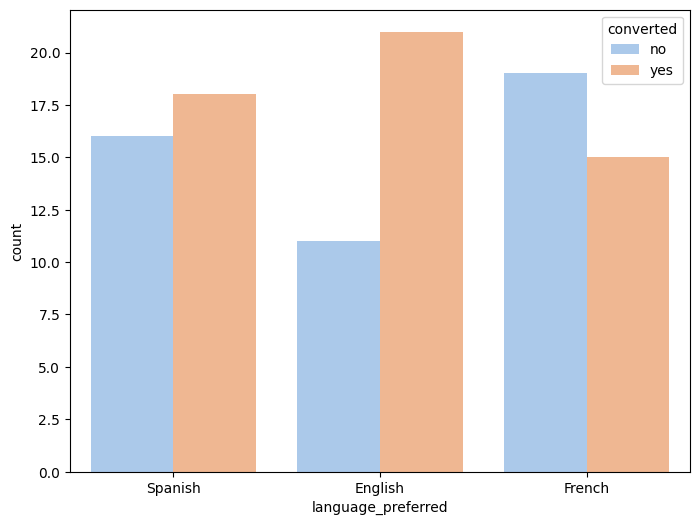

In [ ]:
# visual analysis of the dependency between conversion status and preferred langauge
plt.figure(figsize=(8,6))
sns.countplot(x='language_preferred', hue='converted', data=df, palette='pastel')
plt.show()

Based on this visual analysis, it appears that the conversion rate might differ by language preference, suggesting a potential relationship between conversion and preferred language.Let's perform the hypothesis test to check whether we have enough statistical evidence to say that the conversion status and preferred language are independent or not.

### Step 1: Let's write the null and alternative hypothesis

We will test the null hypothesis

>$H_0:$ Conversion status and preferred language are independent.

against the alternate hypothesis

>$H_a:$  Conversion status and preferred language are related.

### Step 2: Let's have a look on the sample data

In [ ]:
# Create the contingency table using pandas crosstab showing the distribution of two categorical variables
contingency_table = pd.crosstab(df['language_preferred'], df['converted'], margins=True)

# Print the contingency table
print(contingency_table)

converted           no  yes  All
language_preferred              
English             11   21   32
French              19   15   34
Spanish             16   18   34
All                 46   54  100


### Step 3: Select apppropriate test

To determine whether the conversion status (converted) and the preferred language (language_preferred) are independent or related, the most appropriate test is:

**Chi-Square Test of Independence**

Reasons:
* Two categorical variables: Both "conversion status" and "preferred language" are categorical variables.
* Test for association: The Chi-Square Test of Independence is used to examine if there is an association or relationship between these two categorical variables.
* Sample size should be large enough, and expected frequency in each cell of the contingency table should be at least 5.

### Step 4: Decide on the Significance Level (𝛼)

* Choose a significance level, typically
𝛼=0.05 (5%).

### Step 5: Find the p-value

The chi2_contingency() function of Scipy will be used to compute the test statistic and p-value.

In [ ]:
#import the required function
from scipy.stats import chi2_contingency
# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.7970832186581234


###Step 6: Compare the p-value with  α


In [ ]:
# Interpret the p-value
if p_value < 0.05:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")


We fail to reject the null hypothesis.


### Step 7: Draw inference


AS p-Value is greater than level of significance, We fail to reject the null hypothesis.

**Conclusion:** Hence, we do not have enough statistical significance to conclude that conversion status depends on the preferred language

## **4. Is the mean time spent on the new page same for the different language users?**

**Visual Analysis**

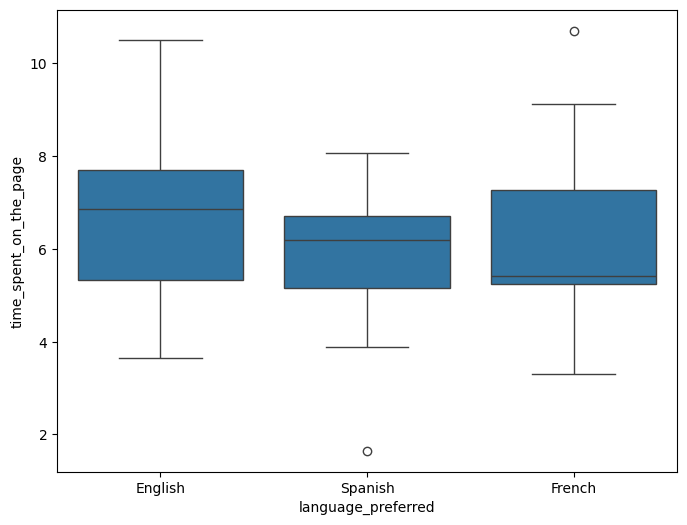

In [ ]:
# Filter data for the new page only
new_page_data = df[df['landing_page'] == 'new']

# Create a box plot to compare time spent across language groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=new_page_data)
plt.show()

In [ ]:
# Checking the mean time spent on the new page for different language users
new_page_data.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


The mean time spent on the new page varies across language groups (English: 6.66, French: 6.20, Spanish: 5.83). However, we need to test if this observed difference is statistically significant.

### Step 1: Let's write the null and alternative hypothesis

**Null Hypothesis (H₀):**  
The mean time spent on the new page is the same for all language groups.   

**Alternative Hypothesis (Ha):**  
At least one language group has a different mean time spent on the new page.  


### Step 2: Select Appropriate test

This is a problem concerning three population means. **One-way ANOVA** is the appropriate test, provided the assumptions of normality and equality of variances are met.

* Normality can be tested using Shapiro-Wilk's test on the response variable (time_spent_on_the_page).

* Equality of variances can be tested using Levene's test across the groups (language_preferred).

If both assumptions are satisfied, ANOVA results will be valid.

**Shapiro-Wilk’s Test**

We will test the null hypothesis:

$H_0$: Time spent on the new page follows a normal distribution.

against the alternative hypothesis

$H_a$: Time spent on the new page does not follow a normal distribution.

The shapiro() function of Scipy will be used to compute the test statistic and p-value.

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy import stats
# find the p-value
w, p_value = stats.shapiro(new_page_data['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040040364746845


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

**Levene’s test**

We will test the null hypothesis:

$H_0$: All the population variances are equal

against the alternative hypothesis:

$H_a$: At least one variance is different from the rest.

The levene() function of Scipy will be used to compute the test statistic and p-value.

In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( new_page_data[new_page_data['language_preferred']=="English"]['time_spent_on_the_page'],
                             new_page_data[new_page_data['language_preferred']=="French"]['time_spent_on_the_page'],
                             new_page_data[new_page_data['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level
As given in the problem statement, we select α = 0.05.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.


### Step 4: Calculate the p-value

The f_oneway() function of Scipy will be used to compute the test statistic and p-value.

In [ ]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(new_page_data[new_page_data['language_preferred']=="English"]['time_spent_on_the_page'],
                             new_page_data[new_page_data['language_preferred']=="French"]['time_spent_on_the_page'],
                             new_page_data[new_page_data['language_preferred']=="Spanish"]['time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 5: Compare the p-value with  α



In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 6: Draw Inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis.

**Conclusion:** we do not have sufficient statistical evidence to conclude that the mean times spent on the new page differ significantly between English, French, and Spanish users.


##  **Conclusion and Business Recommendations**

**Conclusions**

* The analysis of the landing page performance shows that the new design by E-news Express is significantly more effective than the old version in achieving key objectives:

* Increased User Engagement: Users tend to spend more time on the new landing page, suggesting that its design and content are better at capturing attention and keeping users engaged.

* Higher Conversion Rate: The new landing page also leads to a higher conversion rate, meaning more visitors are subscribing after visiting the page. This indicates that the new design is more successful in motivating users to take action.

* Language Independence: There is no notable difference in the time spent on the new page based on users’ preferred languages (English, French, Spanish). This implies that the new design and content are universally engaging, regardless of the user’s language preference.

**Business Recommendations**

Based on these findings, the following actions are recommended for E-news Express:

* Full Implementation: The new landing page should be made the default for the website to ensure that all visitors benefit from its improved design and content. This will likely result in higher user engagement and increased subscriptions.

* Ongoing Performance Monitoring: Regular monitoring of key metrics such as user engagement, conversion rates, and bounce rates should be done to ensure continued success. Any emerging issues or opportunities for improvement should be identified and addressed promptly.

* Focus on Content Strategy: Since the data shows that well-structured content and an appealing layout are key drivers of user engagement and conversion, E-news Express should prioritize creating high-quality, relevant content that resonates with its audience. This content should be consistently updated and optimized to keep users interested and encourage subscriptions.

* Sustain a Data-Driven Approach: The results clearly demonstrate the value of making data-driven decisions. E-news Express should continue to collect and analyze user behavior data to optimize different elements of the website and ensure it is as effective as possible in achieving its goals.

By following these recommendations, E-news Express can capitalize on the success of the new landing page to attract more subscribers, boost user engagement, and drive overall business growth.








In [ ]:
!jupyter nbconvert --to html E_news_Express_Project.ipynb


[NbConvertApp] Converting notebook E_news_Express_Project.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 14 image(s).
[NbConvertApp] Writing 675589 bytes to E_news_Express_Project.html
